# I/O and VOSA helper functions

## Reading photometric data

### From VOSA files

In [1]:
import src.binary_sed_fitting as bsf
file_name = 'data/vosa_results/WOCS2002.bfit.phot.dat'
data = bsf.load_data(file_name, mode='vosa')
data

/Users/vikrantjadhav/Documents/work/Binary_SED_Fitting/src/binary_sed_fitting.py:158: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_name, engine='python', comment='#',


,wavelength,flux,error
FilterID,,,
Astrosat/UVIT.F148W,1481.000000,2.548070e-15,1.361179e-16
Astrosat/UVIT.F154W,1541.000000,2.285731e-15,1.368403e-16
Astrosat/UVIT.F169M,1608.000000,2.360782e-15,1.261129e-16
GALEX/GALEX.NUV,2303.366368,3.296702e-15,8.677147e-17
KPNO/Mosaic.B,4357.276538,9.309407e-14,6.130611e-15
GAIA/GAIA3.Gbp,5035.750275,1.028575e-13,3.881303e-16
KPNO/Mosaic.V,5366.240786,1.079375e-13,7.108112e-15
GAIA/GAIA3.G,5822.388714,9.174216e-14,2.539155e-16
GAIA/GAIA3.Grp,7619.959993,7.878734e-14,3.154436e-16


### From a CSV file
- The flux has to be extinction corrected
- units of flux       = erg/s/A/cm2
- units of wavelength = A

In [2]:
import src.binary_sed_fitting as bsf
file_name = 'data/extinction_corrected_flux_files/WOCS2002.csv'
data = bsf.load_data(file_name, mode='csv')
data

,wavelength,flux,error
FilterID,,,
Astrosat/UVIT.F148W,1481.000000,2.548070e-15,1.361179e-16
Astrosat/UVIT.F154W,1541.000000,2.285731e-15,1.368403e-16
Astrosat/UVIT.F169M,1608.000000,2.360782e-15,1.261129e-16
GALEX/GALEX.NUV,2303.366368,3.296702e-15,8.677147e-17
KPNO/Mosaic.B,4357.276538,9.309407e-14,6.130611e-15
GAIA/GAIA3.Gbp,5035.750275,1.028575e-13,3.881303e-16
KPNO/Mosaic.V,5366.240786,1.079375e-13,7.108112e-15
GAIA/GAIA3.G,5822.388714,9.174216e-14,2.539155e-16
GAIA/GAIA3.Grp,7619.959993,7.878734e-14,3.154436e-16


## Reading model files

In [3]:
import xarray as xr
import src.binary_sed_fitting as bsf

da = xr.open_dataarray(bsf.DIR_MODELS+'koester_synthetic_photometry.nc')
da

<xarray.DataArray (FilterID: 8162, Te: 82, logg: 13)> Size: 70MB
[8700692 values with dtype=float64]
Coordinates:
  * FilterID  (FilterID) <U38 1MB 'IUE/IUE.1250-1300' ... 'QUIJOTE/MFI.11GHz_H3'
  * Te        (Te) int32 328B 5000 5250 5500 5750 ... 50000 60000 70000 80000
  * logg      (logg) float64 104B 6.5 6.75 7.0 7.25 7.5 ... 8.75 9.0 9.25 9.5
Attributes:
    Wavelengths:  [1.28470318e+03 1.35336435e+03 1.35623969e+03 ... 3.8683349...
    unit:         erg/s/cm2/A
    long_name:    Flux

## Creating VOSA input files

### VOSA input format

VOSA requires following format for uploading the photometric information files

| object  | RA  | DEC | dis | Av | filter | flux | error | pntopts | objopts |
| ---     | --- | --- | --- | ---| ---    | ---  | ---   | ---     | ---     |
| ---     | --- | --- | --- | ---| ---    | ---  | ---   | ---     | ---     |

Identify the filters in the files you are uploading (create the "filter_list" accordingly)

Create a file with "name, ra, dec, magnitudes and magnitude errors".
This "photomety_file" be converted to VOSA format

- Note: This code is for a cluster, hence distance and extinction is kept constant
    
The VOSA_input.txt file has magnitudes in the "flux" column. So while uploading to VOSA, keep "file type" as "magnitudes"

In [4]:
import pandas as pd
import numpy as np

df_photometry = pd.read_csv('data/example_photomety_file.csv', engine='python')
df_photometry.set_index('name', inplace=True)

# Adding distance and Av values
distance      = '831.76+-11'       # [pc]
Av            = '0.1736+-0.017'    # 3.1 * E(B-V) [mag]
df_photometry['distance'] = distance
df_photometry['Av'] = Av

print((df_photometry.columns))
df_photometry.head()

Index(['ra', 'dec', 'B', 'e_B', 'V', 'e_V', 'I', 'e_I', 'U', 'e_U', 'R', 'e_R',
       'F148W', 'e_F148W', 'F154W', 'e_F154W', 'F169M', 'e_F169M', 'distance',
       'Av'],
      dtype='object')


,ra,dec,B,e_B,V,e_V,I,e_I,U,e_U,R,e_R,F148W,e_F148W,F154W,e_F154W,F169M,e_F169M,distance,Av
name,,,,,,,,,,,,,,,,,,,,
WOCS2002,132.8492,11.83040,12.300,NaN,11.540,NaN,11.060,NaN,NaN,NaN,NaN,NaN,18.66000,0.058,18.69300,0.065,18.58200,0.058,831.76+-11,0.1736+-0.017
WOCS1007,132.8931,11.85297,11.070,NaN,10.960,NaN,11.072,NaN,NaN,NaN,NaN,NaN,17.03341,0.018,16.87171,0.016,16.63688,0.019,831.76+-11,0.1736+-0.017
Y1168,132.8331,11.81147,18.409,NaN,18.632,NaN,NaN,NaN,18.393,NaN,NaN,NaN,17.02925,0.039,17.06582,0.033,17.17563,0.033,831.76+-11,0.1736+-0.017


### Renaming the columns with SVO Filter Profile Service names
- http://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse

In [5]:
filter_list = ['KPNO/Mosaic.B', 'KPNO/Mosaic.V','KPNO/Mosaic.I', 'KPNO/Mosaic.U','KPNO/Mosaic.R',
               'Astrosat/UVIT.F148W','Astrosat/UVIT.F154W', 'Astrosat/UVIT.F169M']

df_photometry.rename(columns={'ra'      : 'ra', 
                              'dec'     : 'dec',
                              'B'       : 'KPNO/Mosaic.B',
                              'e_B'     : 'e_KPNO/Mosaic.B',
                              'V'       : 'KPNO/Mosaic.V',
                              'e_V'     : 'e_KPNO/Mosaic.V',
                              'I'       : 'KPNO/Mosaic.I',
                              'e_I'     : 'e_KPNO/Mosaic.I',
                              'U'       : 'KPNO/Mosaic.U',
                              'e_U'     : 'e_KPNO/Mosaic.U',
                              'R'       : 'KPNO/Mosaic.R',
                              'e_R'     : 'e_KPNO/Mosaic.R',
                              'F148W'   : 'Astrosat/UVIT.F148W',
                              'e_F148W' : 'e_Astrosat/UVIT.F148W',
                              'F154W'   : 'Astrosat/UVIT.F154W',
                              'e_F154W' : 'e_Astrosat/UVIT.F154W',
                              'F169M'   : 'Astrosat/UVIT.F169M',
                              'e_F169M' : 'e_Astrosat/UVIT.F169M',
                              'distance': 'distance',
                              'Av'      : 'Av'}, 
                     inplace=True)
df_photometry.head()

,ra,dec,KPNO/Mosaic.B,e_KPNO/Mosaic.B,KPNO/Mosaic.V,e_KPNO/Mosaic.V,KPNO/Mosaic.I,e_KPNO/Mosaic.I,KPNO/Mosaic.U,e_KPNO/Mosaic.U,KPNO/Mosaic.R,e_KPNO/Mosaic.R,Astrosat/UVIT.F148W,e_Astrosat/UVIT.F148W,Astrosat/UVIT.F154W,e_Astrosat/UVIT.F154W,Astrosat/UVIT.F169M,e_Astrosat/UVIT.F169M,distance,Av
name,,,,,,,,,,,,,,,,,,,,
WOCS2002,132.8492,11.83040,12.300,NaN,11.540,NaN,11.060,NaN,NaN,NaN,NaN,NaN,18.66000,0.058,18.69300,0.065,18.58200,0.058,831.76+-11,0.1736+-0.017
WOCS1007,132.8931,11.85297,11.070,NaN,10.960,NaN,11.072,NaN,NaN,NaN,NaN,NaN,17.03341,0.018,16.87171,0.016,16.63688,0.019,831.76+-11,0.1736+-0.017
Y1168,132.8331,11.81147,18.409,NaN,18.632,NaN,NaN,NaN,18.393,NaN,NaN,NaN,17.02925,0.039,17.06582,0.033,17.17563,0.033,831.76+-11,0.1736+-0.017


### Creating the VOSA compliant input file from the dataframe

In [6]:
def create_VOSA_input_file(df_photometry, filter_list, output_name=None):
    # combining data from all stars to make the VOSA upload file 
    df_VOSA_input = pd.DataFrame(columns = ['object', 'ra', 'dec','distance','Av','filter','flux','error','pntopts','objopts']) 
    counter=0
    for name in df_photometry.index:
        for filter_name in filter_list:
            df_VOSA_input.loc[counter, 'object']   = name
            df_VOSA_input.loc[counter, 'ra']       = df_photometry['ra'][name]
            df_VOSA_input.loc[counter, 'dec']      = df_photometry['dec'][name]
            df_VOSA_input.loc[counter, 'distance'] = df_photometry['distance'][name]
            df_VOSA_input.loc[counter, 'Av']       = df_photometry['Av'][name]
            df_VOSA_input.loc[counter, 'filter']   = filter_name
            df_VOSA_input.loc[counter, 'flux']     = df_photometry[filter_name][name]
            df_VOSA_input.loc[counter, 'error']    = df_photometry['e_'+filter_name][name]
            df_VOSA_input.loc[counter, 'pntopts']  = '---'
            df_VOSA_input.loc[counter, 'objopts']  = '---'

            # Rewriting the row if flux is not available for this star-filter combination
            if ~np.isnan(df_photometry[filter_name][name]):
                counter=counter+1
    df_VOSA_input.fillna('---', inplace=True)
    if output_name !=None:
        df_VOSA_input.to_csv(output_name, header=None, index=None, sep=' ')
    return df_VOSA_input

create_VOSA_input_file(df_photometry, filter_list, output_name='data/example_VOSA_input_file.txt')

/var/folders/2v/ztlgg9951mdc3j88_z3gbscc0000gn/T/ipykernel_5393/3182199717.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_VOSA_input.fillna('---', inplace=True)


,object,ra,dec,distance,Av,filter,flux,error,pntopts,objopts
0,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,KPNO/Mosaic.B,12.30000,---,---,---
1,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,KPNO/Mosaic.V,11.54000,---,---,---
2,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,KPNO/Mosaic.I,11.06000,---,---,---
3,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,Astrosat/UVIT.F148W,18.66000,0.058,---,---
4,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,Astrosat/UVIT.F154W,18.69300,0.065,---,---
5,WOCS2002,132.8492,11.83040,831.76+-11,0.1736+-0.017,Astrosat/UVIT.F169M,18.58200,0.058,---,---
6,WOCS1007,132.8931,11.85297,831.76+-11,0.1736+-0.017,KPNO/Mosaic.B,11.07000,---,---,---
7,WOCS1007,132.8931,11.85297,831.76+-11,0.1736+-0.017,KPNO/Mosaic.V,10.96000,---,---,---
8,WOCS1007,132.8931,11.85297,831.76+-11,0.1736+-0.017,KPNO/Mosaic.I,11.07200,---,---,---
9,WOCS1007,132.8931,11.85297,831.76+-11,0.1736+-0.017,Astrosat/UVIT.F148W,17.03341,0.018,---,---


Now upload the file at http://svo2.cab.inta-csic.es/theory/vosa/index.php?action=myfiles&otype=star&seeall= 

Make sure to change the File type to `magnitude``

Keep SED Type: Flux vs Lambda 

Select the file and search through VO for all possible detections Look at the SEDs, 

Possibly remove some telescopes (e.g. SDSS photometry is problematic for bright M67 stars, Gaia DR3 synthetic photometry may or may not be usable)


## Create flux corrected files from VOSA
- DEPRECATED
    - NO LONGER  REQUIRED AS `bsf.load_data()` CAN NOW USE VOSA FILES DIRECTLY

In [7]:
import pandas as pd
def create_extinction_corrected_files_from_VOSA(name, file_name, output_name, verbose=True):
    # Reading parameters derived by VOSA
    flux         = pd.read_csv(file_name, engine='python', comment='#', delim_whitespace= True, skipinitialspace=True, header=None)
    flux.columns = ['FilterID','wavelength','Obs.Flux','Obs.Error','flux','error','model_flux_A','Fitted','Excess','FitExc','UpLim']

    # Removing filters noted as "upper limit"
    if verbose: print('WARNING: %s removed due to upper limit'%(flux[flux['UpLim']=='1']['FilterID'].values))
    flux         = flux[flux['UpLim'] == '---']
    flux         = flux.drop(columns=['Obs.Flux','Obs.Error','Fitted','Excess','FitExc','UpLim','model_flux_A'])
    flux.to_csv(output_name, index=False)
    return flux

DIR_OBS = 'data/'

for idx, name in enumerate(['WOCS2002','WOCS1007','Y1168']):    
    print(name)
    # file_name = DIR_OBS + name +'/bestfitp/'+ name +'.bfit.phot.dat'
    file_name = 'data/vosa_results/%s.bfit.phot.dat'%name
    flux = create_extinction_corrected_files_from_VOSA(name,file_name, output_name='data/extinction_corrected_flux_files/'+name+'.csv')

WOCS2002
WOCS1007
Y1168


/var/folders/2v/ztlgg9951mdc3j88_z3gbscc0000gn/T/ipykernel_5393/1800319444.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux         = pd.read_csv(file_name, engine='python', comment='#', delim_whitespace= True, skipinitialspace=True, header=None)
/var/folders/2v/ztlgg9951mdc3j88_z3gbscc0000gn/T/ipykernel_5393/1800319444.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux         = pd.read_csv(file_name, engine='python', comment='#', delim_whitespace= True, skipinitialspace=True, header=None)
/var/folders/2v/ztlgg9951mdc3j88_z3gbscc0000gn/T/ipykernel_5393/1800319444.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux         = pd.read_csv(file_name, engine='python', comment='#', d

## Logo

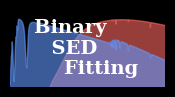

In [10]:
import xarray as xr
import src.binary_sed_fitting as bsf
import matplotlib.pyplot as plt

da = xr.open_dataarray(bsf.DIR_MODELS+'koester_spectral_library.nc')
y1 = da.sel(Te=6000).sel(logg=7.0)*4e2
y2 = da.sel(Te=15000).sel(logg=7.0)*1.5

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(2,1))

ax.fill_between(da.Wavelength, y1, alpha=0.6, color='#FF6961')
ax.fill_between(da.Wavelength, y2, alpha=0.6, color='#6198ff')

ax.loglog()
ax.set_xlim(969,8000)
ax.set_ylim(3000000)
ax.axis('off')
ax.text(0.5, 0.5, 'Binary     \n  SED      \n    Fitting', fontsize=14, transform=ax.transAxes,
        va='center', ha='center', color='white', family='serif', variant='small-caps', weight='bold')
plt.savefig('sphinx/logo.png', dpi=200, bbox_inches='tight')